In [2]:
import pandas as pd
import numpy as np
import sklearn.model_selection as sk_ms
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_excel('train_nodummy.xlsx')

In [5]:
train=train.iloc[:,1:]
train

,id,description,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type#Entire home/apt,room_type#Hotel room,room_type#Private room,room_type#Shared room,...,beds,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,amenities_percent,price
0,44117862,A truly epic loft in the heart of Greenwich vi...,0,1,1,Greenwich Village,1,0,0,0,...,-0.593900,-0.436162,2.207695,-0.430537,-0.714281,0.520142,-0.345682,-0.309587,-0.679270,499.0
1,659230581060046976,A spacious unit which sleeps eight people on ...,0,1,1,Midtown,0,0,1,0,...,2.628974,-0.548005,1.102128,-0.413495,-0.790039,0.520142,0.264057,0.203000,0.044344,223.0
2,32789340,Charming one bedroom apartment in the heart of...,0,1,1,West Village,1,0,0,0,...,-0.593900,-0.520044,-0.740483,-0.226034,-0.044613,0.409726,-0.345682,-0.277550,0.285549,170.0
3,48425839,The apartment is located in the charming neigh...,1,1,1,Inwood,1,0,0,0,...,-0.593900,-0.492083,0.049208,0.319305,-0.797900,0.244102,-0.309097,0.743046,0.767958,145.0
4,654352127095037056,Centrally located on Central Park South this s...,0,1,1,Midtown,1,0,0,0,...,-0.593900,-0.548005,2.155049,-0.396453,-0.794327,0.520142,-0.345682,0.116043,-2.126497,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11570,51715942,Rare opportunity to rent at a 5th Avenue addre...,0,1,0,Central Park,1,0,0,0,...,-0.593900,-0.520044,0.786252,0.046635,-0.799330,0.188894,-0.345682,0.857463,1.250367,450.0
11571,144148,"Amazing room, with private roof deck. Sits in ...",0,1,1,East Village,0,0,1,0,...,-0.593900,0.262854,-0.740483,0.097761,0.940235,-0.128551,-0.345682,-0.268397,-1.402883,67.0
11572,616834723568263936,-Great location - L/Q/R/N/W/4/5/6/ train line...,0,1,1,Gramercy,1,0,0,0,...,0.480392,-0.436162,-0.687837,-0.362369,-0.799330,-0.307976,-0.345682,0.592017,0.044344,205.0
11573,50210777,"Our comfortable, safe, cozy and relaxing 4 Bed...",0,1,1,Hell's Kitchen,1,0,0,0,...,3.703265,0.262854,2.418279,-0.447578,2.002985,0.257904,-0.345682,-0.419427,1.009162,449.0


In [8]:
test=pd.read_excel('test_nodummy.xlsx')
test=test.iloc[:,1:]
test

,id,description,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type#Entire home/apt,room_type#Hotel room,room_type#Private room,room_type#Shared room,...,beds,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,amenities_percent,price
0,5178,Please don鈥檛 expect the luxury here just a bas...,0,1,0,Midtown,0,0,1,0,...,-0.593900,-0.520044,-0.529899,8.925436,-0.790039,-0.542610,-0.345682,1.132063,0.044344,68
1,593311739520916992,This cubicle room is just for you and nobody e...,0,1,1,Chelsea,0,0,1,0,...,-0.593900,-0.548005,0.944190,-0.021532,-0.794327,-0.363184,-0.089591,1.900943,0.044344,92
2,47269867,The best Central location. <br />Union Square ...,0,1,1,Gramercy,1,0,0,0,...,-0.593900,-0.380241,1.312712,-0.413495,-0.788609,0.520142,-0.345682,-0.369083,-0.438065,414
3,4509560,BRAND NEW !!! Fully furnished Studio Apartment...,0,1,1,Stuyvesant Town,1,0,0,0,...,0.480392,0.262854,-0.740483,-0.140825,-0.659250,-0.376986,-0.089591,-0.327893,1.009162,130
4,1118031,Private Bedroom for one in the best neighborho...,1,1,0,Nolita,0,0,1,0,...,-0.593900,0.011208,0.680960,0.489723,-0.761451,0.437330,-0.321292,-0.190593,1.009162,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,51262978,Welcome to my comfortable and well designed 2B...,1,1,1,Chinatown,1,0,0,0,...,1.554683,0.262854,-0.687837,-0.277160,-0.784321,0.520142,-0.345682,-0.080753,0.044344,300
2875,52553162,No human interaction is needed during your sta...,0,1,0,Midtown,1,0,0,0,...,-0.593900,-0.548005,-0.740483,-0.004491,-0.799330,-0.432194,0.178694,0.674396,-0.438065,189
2876,27788826,Come explore New York City in this delightful ...,0,1,1,Upper East Side,1,0,0,0,...,-0.593900,0.262854,-0.740483,-0.396453,0.236262,0.520142,-0.345682,-0.391967,-0.438065,123
2877,18227529,"Art Deco 1 Bed morning in Morningside Hts, nea...",0,1,1,Harlem,1,0,0,0,...,1.554683,-0.520044,-0.740483,1.086187,-0.028890,0.354518,-0.333487,0.221307,1.009162,146


In [12]:
mean_refer=train.groupby('neighbourhood_cleansed').mean()['price']
train['neighbourhood_cleansed']=train['neighbourhood_cleansed'].apply(lambda x: mean_refer[x])
test['neighbourhood_cleansed']=test['neighbourhood_cleansed'].apply(lambda x: mean_refer[x])

In [16]:
col=train.columns.values.tolist()
col.remove('price') 
x_train = train[col]
y_train = train[['price']]
x_test = test[col]
y_test = test[['price']]

In [17]:
for i in ['id','description']:
    del x_train[i]
    del x_test[i]

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
model1 = RandomForestRegressor()
# regr = RandomForestRegressor(random_state=100,
#                              bootstrap=True,
#                              max_depth=2,
#                              max_features=2,
#                              min_samples_leaf=3,
#                              min_samples_split=5,
#                              n_estimators=3)
model1.fit(x_train, y_train)

RandomForestRegressor()

In [19]:
print(model1.n_estimators,model1.max_features,model1.min_samples_leaf,model1.min_samples_split)

100 auto 1 2


In [20]:
print("Training R-Square",model1.score(x_train,y_train))
print("Testing R-Square",model1.score(x_test,y_test))

Training R-Square 0.9525665473489611
Testing R-Square 0.6790394011243746


### （1)Feature importance

Text(0.5, 0, 'Relative Importance')

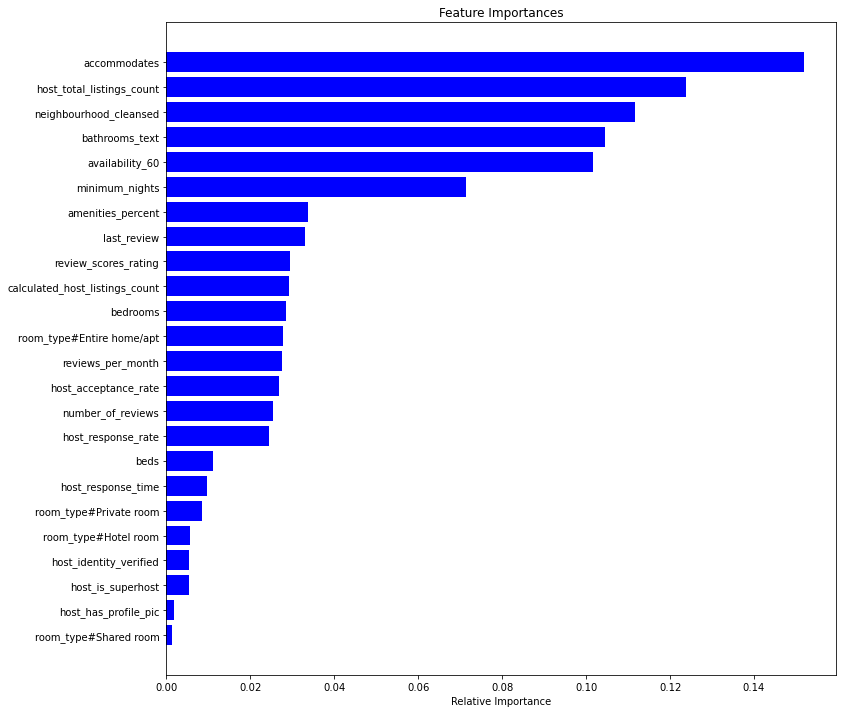

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model1.feature_importances_
feature_names=list(x_train.columns)
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [26]:
from sklearn.model_selection import GridSearchCV
import numpy as np


n_estimators_range=[int(x) for x in np.linspace(start=100,stop=500,num=5)]
max_depth_range=[int(x) for x in np.linspace(20,100,num=5)]
min_samples_split_range=[1,2,4]
# min_samples_leaf_range=[1,2,4]
# # bootstrap_range=[True,False]

random_forest_hp_range={'n_estimators':n_estimators_range ,
                        'max_depth':max_depth_range,
                        'min_samples_split':min_samples_split_range
#                         'min_samples_leaf':min_samples_leaf_range 
                       # 'bootstrap':bootstrap_range
                        }
gridmodel = GridSearchCV(RandomForestRegressor(), param_grid=random_forest_hp_range, cv=5)

In [27]:
gridmodel.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 40, 60, 80, 100],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [28]:
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.669
best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 400}


In [46]:
model1 = RandomForestRegressor(n_estimators=400,
                              max_depth=20,
                              min_samples_split=2)
model1.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=400)

In [47]:
print("Training R-Square",model1.score(x_train,y_train))
print("Testing R-Square",model1.score(x_test,y_test))

Training R-Square 0.946393793336409
Testing R-Square 0.686497787184313


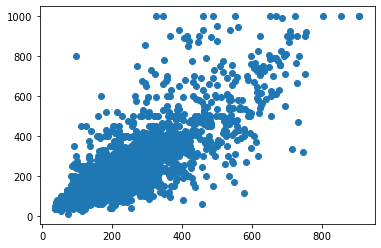

In [52]:
predict_list=model1.predict(x_test)
plt.scatter(predict_list,test['price'])

In [53]:
test['predict']=predict_list
test['price_diff']=test['predict']-test['price']

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 
print(f"均方误差(MSE)：{mean_squared_error(predict_list, test['price'])}")
print(f"根均方误差(RMSE)：{np.sqrt(mean_squared_error(predict_list, test['price']))}")

均方误差(MSE)：8630.322864193113
根均方误差(RMSE)：92.89953102246056


In [55]:
df_text_mining=test[['id','description','price','predict','price_diff']]

In [56]:
df_text_mining.to_csv('test_tree_nodummy.csv')